<a href="https://colab.research.google.com/github/JaidyNar/TalentoTech/blob/master/Ejercicio_imputaci%C3%B3n_Vinos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**type:**  tipo de vino, por ejemplo, vino blanco o vino tinto.

**fixed acidity:** La acidez fija se refiere a la cantidad de ácidos fijos en el vino, como el ácido tartárico.

**volatile acidity**: La acidez volátil se refiere a la cantidad de ácidos volátiles en el vino, que pueden afectar su aroma y sabor.

**citric acid: **El ácido cítrico es un ácido que se encuentra naturalmente en muchas frutas cítricas y se puede agregar al vino para ajustar su acidez.

**residual sugar:** El azúcar residual es la cantidad de azúcar que queda en el vino después de la fermentación.

**chlorides:** Los cloruros se refieren a la concentración de cloruros en el vino, lo cual puede afectar su sabor.

**free sulfur dioxide:** El dióxido de azufre libre es un compuesto que se utiliza como conservante en el vino.

**total sulfur dioxide:** El dióxido de azufre total es la suma del dióxido de azufre libre y el dióxido de azufre unido a otras moléculas en el vino.

**density:** La densidad del vino es una medida de su masa por unidad de volumen.

**pH:** El pH es una medida de la acidez o alcalinidad del vino.

**sulphates (sulfatos):** Los sulfatos son compuestos que pueden estar presentes en el vino y afectar su aroma y sabor.

**alcohol:** El contenido de alcohol en el vino, expresado típicamente como un porcentaje de volumen.

---


**quality:** La calidad del vino, que puede estar representada por una puntuación o una clasificación.

In [40]:
!pip install plotly
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler

In [41]:
imputacion = "/content/drive/MyDrive/google colab/Wine_Quality.csv"
data = pd.read_csv(imputacion)

In [42]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [43]:
print(data.shape)

(6497, 13)


In [44]:
data.describe([0.01, 0.05, 0.75, 0.90, 0.99]).T

,count,mean,std,min,1%,5%,50%,75%,90%,99%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,5.10000,5.7000,7.00000,7.70000,8.8000,12.00000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.12000,0.1600,0.29000,0.40000,0.5900,0.88000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.00000,0.0500,0.31000,0.39000,0.4900,0.74000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,0.90000,1.2000,3.00000,8.10000,13.0000,18.20000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.02100,0.0280,0.04700,0.06500,0.0860,0.18624,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,4.00000,6.0000,29.00000,41.00000,54.0000,77.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,11.00000,19.0000,118.00000,156.00000,188.0000,238.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.98892,0.9899,0.99489,0.99699,0.9984,1.00060,1.03898
pH,6488.0,3.218395,0.160748,2.72000,2.89000,2.9700,3.21000,3.32000,3.4200,3.64000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.30000,0.3500,0.51000,0.60000,0.7200,0.99000,2.00000


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [46]:
#datos en cero
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [47]:
# Para las columnas que no pueden ser cero, se reemplaza por NAN, con eso se elimina el sesgo que pueden introducir datos
data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']] = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']].replace(0,np.NaN)
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [48]:
# Creando un gráfico de datos faltantes para conocer cuantos valores incompletos hay en el conjunto de datos
def missing_plot(dataset, key) :
    null_feat = pd.DataFrame(len(dataset[key]) - dataset.isnull().sum(), columns = ['Count'])
    percentage_null = pd.DataFrame((len(dataset[key]) - (len(dataset[key]) - dataset.isnull().sum()))/len(dataset[key])*100, columns = ['Count'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, text = percentage_null['Count'],  textposition = 'auto',marker=dict(color = '#7EC0EE',
            line=dict(color='#000000',width=1.5)))

    layout = dict(title = "Missing Values (count & %)")

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [49]:
print(data.shape)

(6497, 13)


In [50]:
# Plotting
missing_plot(data, 'fixed acidity')

In [51]:
# revisando los datos faltantes en forma de tabla (missing columns)
def missing_percent(data):
        # Total missing values
        mis_val = data.isnull().sum()

        # Percentage of missing values
        mis_percent = 100 * data.isnull().sum() / len(data)

        # Make a table with the results
        mis_table = pd.concat([mis_val, mis_percent], axis=1)

        # Rename the columns
        mis_columns = mis_table.rename(
        columns = {0 : 'Missing Values', 1 : 'Percent of Total Values'})

        # Sort the table by percentage of missing descending
        mis_columns = mis_columns[
            mis_columns.iloc[:,1] != 0].sort_values(
        'Percent of Total Values', ascending=False).round(2)

        # Print some summary information
        print ("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"
            "There are " + str(mis_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_columns

miss_cols_info = missing_percent(data)
miss_cols_info

Your selected dataframe has 13 columns.
There are 7 columns that have missing values.


,Missing Values,Percent of Total Values
citric acid,153,2.35
fixed acidity,10,0.15
pH,9,0.14
volatile acidity,8,0.12
sulphates,4,0.06
residual sugar,2,0.03
chlorides,2,0.03


In [52]:
# Las columnas con valores faltantes de más del 70% son eliminadas, se considera que en este caso los valores tienen tantas columnas faltantes que no se puede hacer nada con ellos.
 # se aplicarán diferentes operaciones de acuerdo a las proporciones de faltantes en el conjunto de datos. Por ejemplo, se quieren eliminar las variables independientes que tengan más del 25% de los datos faltantes.

data_drop = data.copy()
data_drop.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [53]:
# Eliminando columnas con mas del 25% de datos faltantes
drop_cols = miss_cols_info[miss_cols_info['Percent of Total Values'] > 25]
drop_cols
# En este caso No se eliminan la columnas

,Missing Values,Percent of Total Values


In [54]:
col_names = drop_cols.index.tolist()
col_names
data_drop.drop(col_names, axis = 1, inplace=True)
data_drop.head()
print("Registros en el conjunto de datos original", data.shape)
print("Registros en el conjunto de datos", data_drop.shape)
# dataset con columnas eliminadas, en este caso se tiene el dataset sin esas dos características.

Registros en el conjunto de datos original (6497, 13)
Registros en el conjunto de datos (6497, 13)


In [55]:
# si bien, una forma de trabajar con los datos es eliminar las columnas con faltantes (eliminar las características)
# sin embargo se podría optar por un enfoque diferente y es eliminar los registros que tengan NaN en esas columnas, es decir, no enfocarnos en las filas sino en las columnas
data_drop_rows = data.copy() # otra copia del dataset para evitar dañar los datos ya cargados en memoria
data_drop_rows.dropna(inplace=True) # eliminar NaNs en columnas con datos faltantes
print("Registros en el conjunto de datos original", data.shape)
print("Registros en el conjunto de datos", data_drop_rows.shape)
data_drop_rows.head()
# en este caso se mantienen las 13 columnas, pero se borran 183 filas

Registros en el conjunto de datos original (6497, 13)
Registros en el conjunto de datos (6313, 13)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


<ipython-input-56-0da8a2627686>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



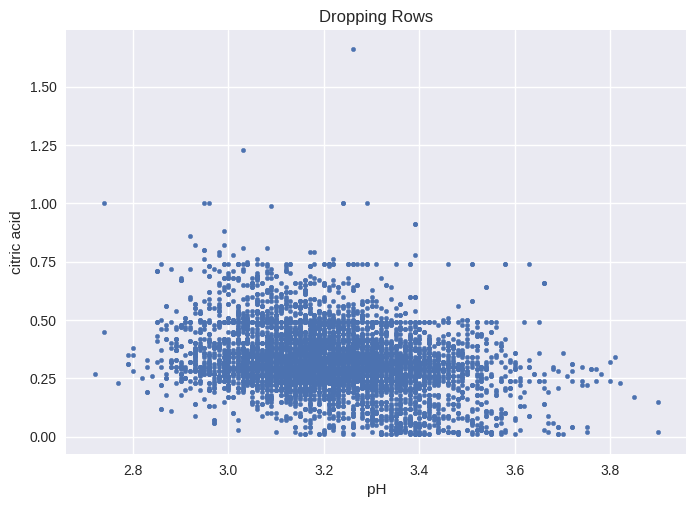

In [56]:
# Analyze visually with scatter plot
plt.style.use('seaborn')
fig = plt.Figure()
fig = data_drop_rows.plot(x="pH", y='citric acid', kind='scatter',
                    s = 10,
                    title='Dropping Rows', colorbar=False)

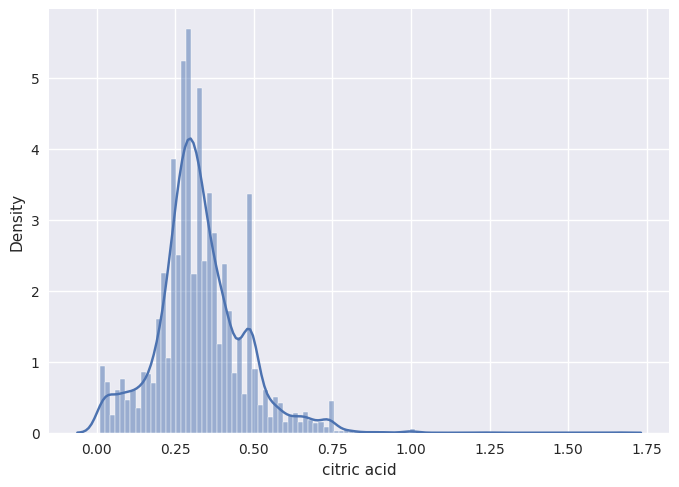

In [57]:
sns.histplot(
    data_drop_rows["citric acid"], kde=True,
    stat="density", kde_kws=dict(cut=3)
)
sns.set_style("darkgrid")

In [58]:
data_mean = data.copy()
round(data_mean['citric acid'].mean(), 2)


0.33

<ipython-input-59-7e07cdeed18d>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



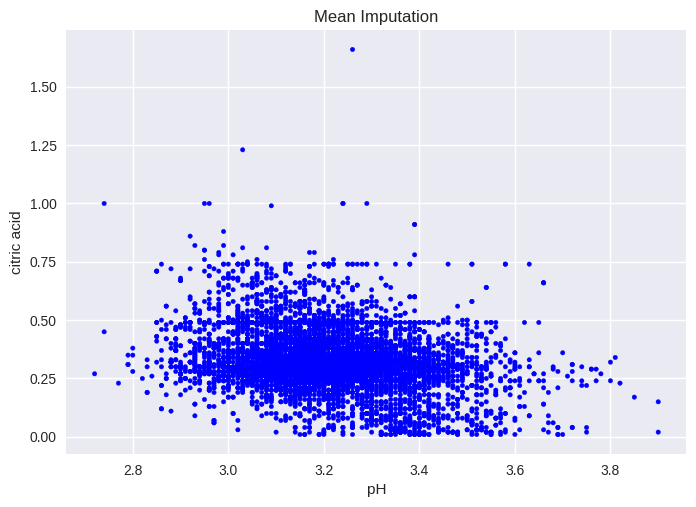

In [59]:
# Analyze visually with scatter plot
plt.style.use('seaborn')
fig = plt.Figure()
null_values = data['citric acid'].isnull()
fig = data_mean.plot(x="pH", y='citric acid', kind='scatter',
                     c=null_values, cmap='winter',s = 10,
                     title='Mean Imputation', colorbar=False)

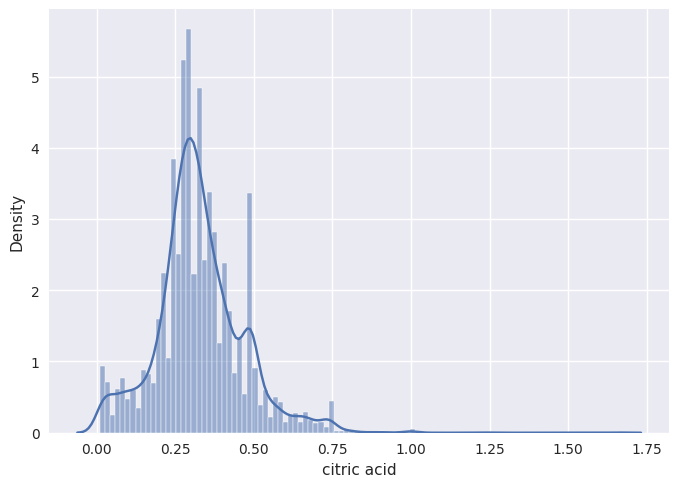

In [60]:
sns.histplot(
    data_mean["citric acid"], kde=True,
    stat="density", kde_kws=dict(cut=3)
)
sns.set_style("darkgrid")


<ipython-input-61-76296a86fe42>:14: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



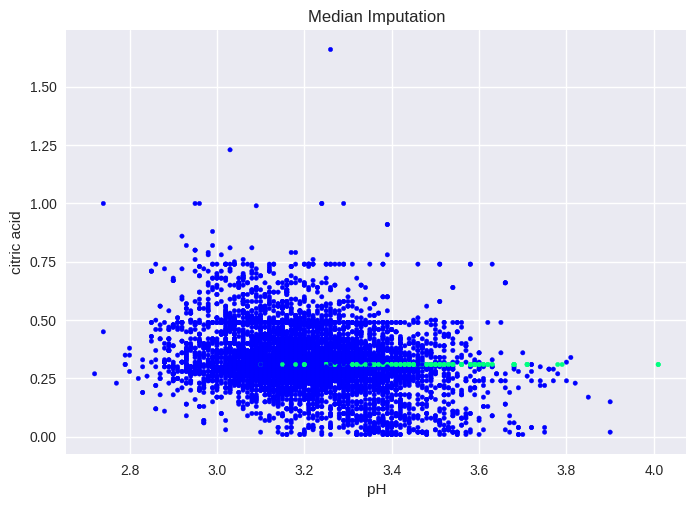

In [61]:
data_median = data.copy()
round(data_median['citric acid'].median(), 2)


# Imputacion con la mediana
median_imputer = SimpleImputer(missing_values = np.nan,
                        strategy ='median')
data_median['citric acid'] = median_imputer.fit_transform(
    data_median['citric acid'].values.reshape(-1,1))



# Analizar visualmente con diagrama de dispersión
plt.style.use('seaborn')
fig = plt.Figure()
null_values = data['citric acid'].isnull()
fig = data_median.plot(x="pH", y='citric acid', kind='scatter',
                     c=null_values, cmap='winter',s = 10,
                     title='Median Imputation', colorbar=False)

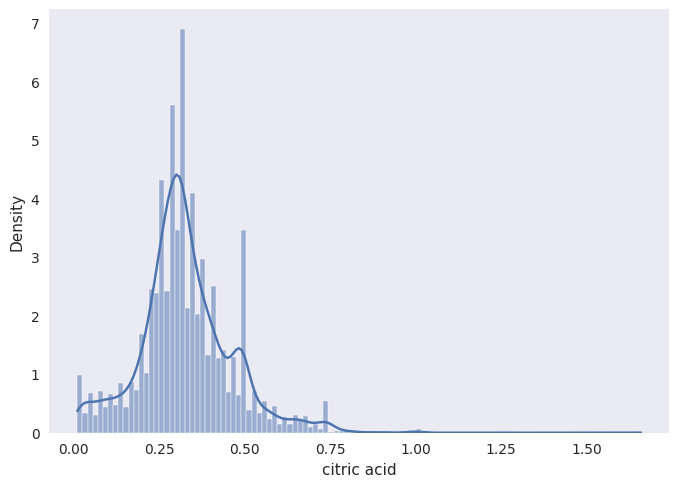

In [62]:
sns.histplot(
    data_median["citric acid"], kde=True,
    stat="density")
plt.grid()
sns.set_style("darkgrid")

Most of the imputation technique can cause bias. Simple imputation can result in an underestimation of standard errors. Simple imputed data for any statistic can lead to an underestimation of the standard error. As the number of missing data increases, simple imputation methods should be avoided.

2.2) Advanced imputation methods

One commonly adopted strategy for addressing missing data is to employ a predictive model to estimate the absent values. This technique entails developing a separate model for each input variable containing missing entries.

The default value of K is set to 5. Although there is no definitive method for determining the ideal value of K, a commonly used heuristic suggests that the optimal K is often the square root of the total number of samples in the dataset. Typically, an odd value is chosen for K to prevent ties in decision-making. To identify the most suitable K, an error plot or accuracy plot is commonly used.

In [63]:
data_knn = data.copy()
data_knn = data_knn.filter(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'], axis=1).copy()
data_knn.head()


scaler = MinMaxScaler(feature_range=(0, 1))
data_knn = pd.DataFrame(scaler.fit_transform(data_knn), columns = data_knn.columns)

# Define KNN imputer and fill missing values
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
data_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(data_knn), columns=data_knn.columns)


data_knn_imputed.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.264463,0.126667,0.212121,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942,0.5
1,0.206612,0.146667,0.200000,0.015337,0.066445,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391,0.5
2,0.355372,0.133333,0.236364,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348,0.5
3,0.280992,0.100000,0.187879,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,0.5
4,0.280992,0.100000,0.187879,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,0.5


In [64]:
original_data = scaler.inverse_transform(data_knn_imputed)
# Convert the original data to a DataFrame
data_original = pd.DataFrame(original_data, columns=data_knn.columns)


data_original.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


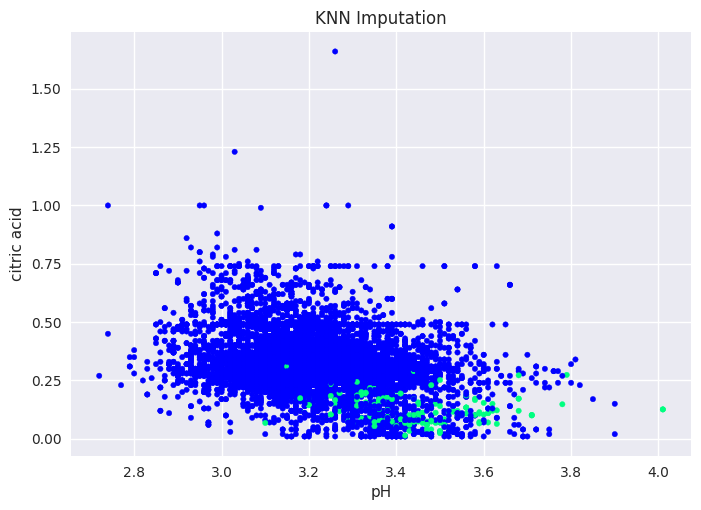

In [65]:
fig = plt.Figure()
null_values = data['citric acid'].isnull()
fig = data_original.plot(x='pH', y='citric acid', kind='scatter',
                          c=null_values, cmap='winter', s = 15,
                          title='KNN Imputation', colorbar=False)

Text(0.5, 1.0, 'KNN Imputation')

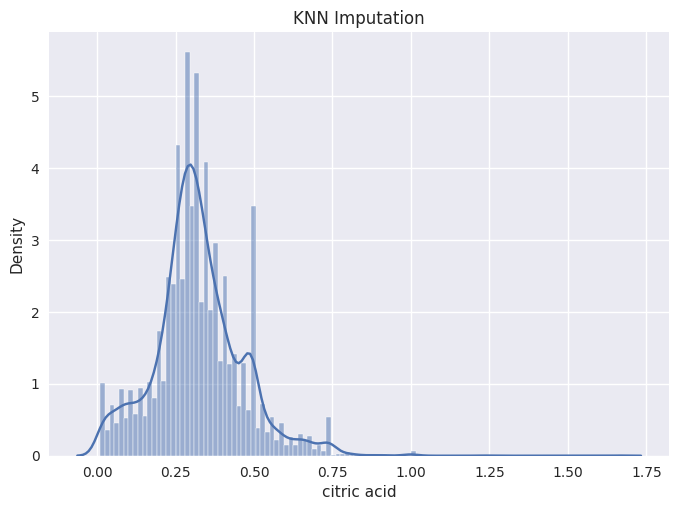

In [66]:
sns.histplot(
    data_original["citric acid"], kde=True,
    stat="density", kde_kws=dict(cut=3)
)
plt.title('KNN Imputation')

La imputación de K-vecinos más cercanos (KNN) tiende a generar costos computacionales más altos en comparación con los métodos de imputación simples. Sin embargo, es importante señalar que la imputación KNN sigue siendo eficaz para conjuntos de datos que no superan la escala de decenas de millones de registros. Sin embargo, como podemos ver en los diagramas de dispersión, knn parece haber completado los valores faltantes de una manera que no distorsiona una distribución normal.

MICE Imputation, abreviatura de 'Imputación múltiple por ecuación encadenada', es una técnica avanzada de imputación de datos faltantes que utiliza múltiples iteraciones de entrenamiento de modelos de aprendizaje automático para predecir los valores faltantes utilizando valores conocidos de otras características de los datos como predictores. ¿Cómo funciona el algoritmo MICE?

Aquí hay una intuición rápida (no el algoritmo exacto)

Básicamente, se toma la variable que contiene valores faltantes como respuesta 'Y' y otras variables como predictores 'X'.
Construya un modelo con filas donde no falte Y.
Luego predice las observaciones que faltan. Haga esto varias veces haciendo extracciones aleatorias de los datos y tomando la media de las predicciones.

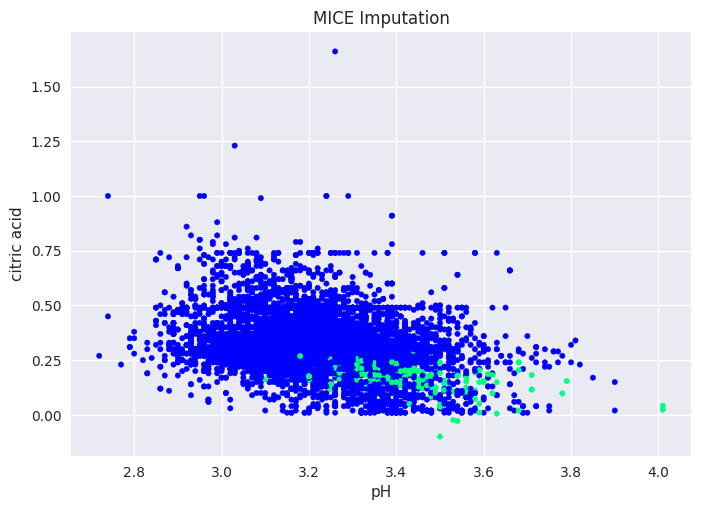

In [32]:
data = data.copy()
data_mice = data.filter(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'], axis=1).copy()

# # Definir MICE Imputer y completar los valores faltantes
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')
data_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(data_mice), columns=data_mice.columns)

fig = plt.Figure()
null_values = data['citric acid'].isnull()
fig = data_mice_imputed.plot(x='pH', y='citric acid', kind='scatter',
                           c=null_values, cmap='winter', s = 15,
                           title='MICE Imputation', colorbar=False)


Text(0.5, 1.0, 'MICE Imputation')

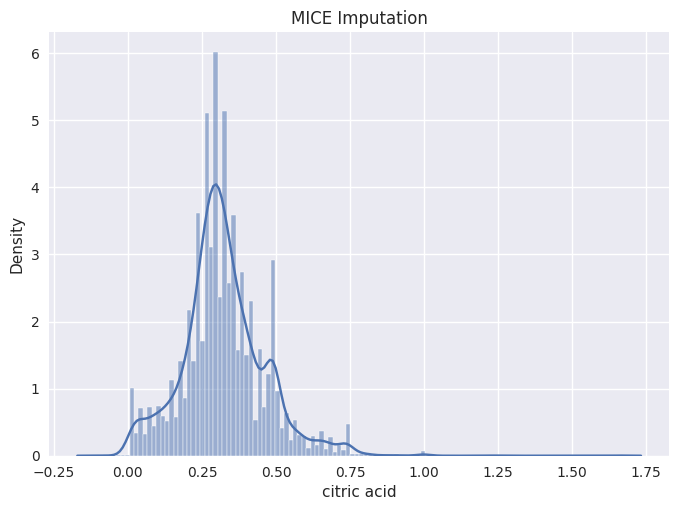

In [33]:
sns.histplot(
    data_mice_imputed["citric acid"], kde=True,
    stat="density", kde_kws=dict(cut=3)
)
plt.title('MICE Imputation')

In [34]:
# Comparacion de todos los métodos
drop_rows = pd.Series(data_drop_rows["citric acid"], name='drop_rows')
data_mean_ins = pd.Series(data_mean["citric acid"], name='Mean_Imp')
data_median_ins = pd.Series(data_median["citric acid"], name='Median_Imp')
data_knn_ins = pd.Series(data_original["citric acid"], name='KNN_Imp')
data_mice_ins = pd.Series(data_mice_imputed["citric acid"], name='MICE_Imp')

In [35]:
data_all = pd.concat([data_mean_ins,data_median_ins,data_knn_ins,data_mice_ins],axis=1)
data_all.head()

,Mean_Imp,Median_Imp,KNN_Imp,MICE_Imp
0,0.36,0.36,0.36,0.36
1,0.34,0.34,0.34,0.34
2,0.40,0.40,0.40,0.40
3,0.32,0.32,0.32,0.32
4,0.32,0.32,0.32,0.32


In [36]:

data_dropped = drop_rows.to_frame()
drop_desc = data_dropped.describe().loc[['mean', 'std']].T
drop_desc


,mean,std
drop_rows,0.326331,0.138303


In [37]:

drop_desc['std'][0]

0.13830269490234143

In [38]:
data_desc = data_all.describe().loc[['mean', 'std']].T
data_desc

,mean,std
Mean_Imp,0.326258,0.138354
Median_Imp,0.325875,0.136737
KNN_Imp,0.321629,0.140275
MICE_Imp,0.322326,0.139374


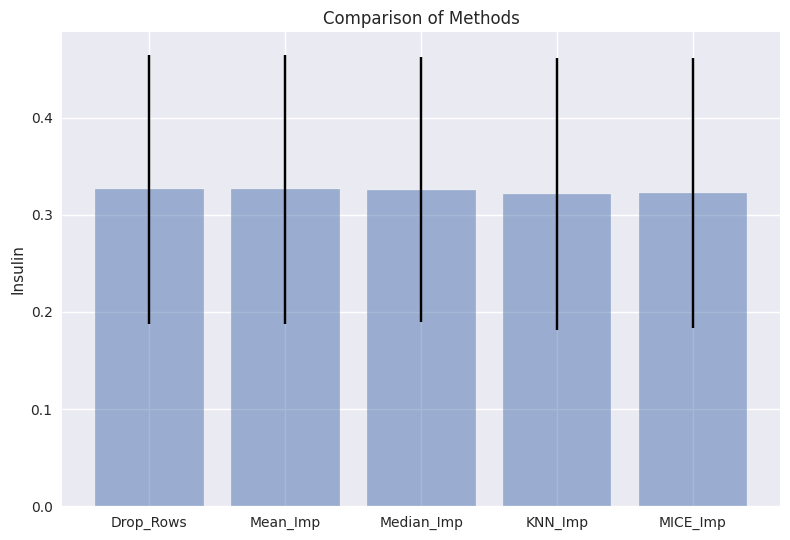

In [39]:
# barras de error
# Define etiquetas, posiciones, alturas de barras y alturas de barras de error
labels = ['Drop_Rows','Mean_Imp', 'Median_Imp', 'KNN_Imp', 'MICE_Imp']
x_pos = np.arange(len(labels))
CTEs = [drop_desc['mean'][0],data_desc["mean"][0], data_desc["mean"][1], data_desc["mean"][2], data_desc["mean"][3]]
error = [drop_desc['std'][0],data_desc["std"][0], data_desc["std"][1], data_desc["std"][2], data_desc["std"][3]]

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('Insulin')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Comparison of Methods')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()